<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_isSubtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given two non-empty binary trees s and t, check whether tree t has exactly the same structure and node values with a subtree of s. A subtree of s is a tree consists of a node in s and all of this node's descendants. The tree s could also be considered as a subtree of itself.

##Solution:
To solve this problem, we need to write a function that checks whether a binary tree `t` is a subtree of another binary tree `s`. The approach involves comparing the nodes of the two trees to determine if they have the same structure and node values. We can break down this problem into two main steps:

1. **Traversal**: Traverse through the nodes of tree `s` to find a node that has the same value as the root of tree `t`. This step can be efficiently done using a depth-first search (DFS) approach.

2. **Comparison**: Once a node with the same value is found in `s`, compare the subtree rooted at this node with tree `t` to check if they are identical. This comparison involves checking if both trees have the same structure and node values.

##Implementation:

In this code:
- `TreeNode` is the class representing a node in the binary tree.
- The `isSubtree` function checks if `t` is a subtree of `s`.
- The `isSameTree` function is a helper function used to compare two trees to determine if they are identical.

This solution effectively traverses the nodes of tree `s` and for each node, it invokes the `isSameTree` function to check if the subtree rooted at that node is identical to tree `t`.


Here's the Python function to accomplish this:

In [2]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def isSubtree(s, t):
    if not s:
        return False

    if isSameTree(s, t):
        return True

    return isSubtree(s.left, t) or isSubtree(s.right, t)

def isSameTree(s, t):
    if not s and not t:
        return True
    if not s or not t:
        return False
    if s.val != t.val:
        return False

    return isSameTree(s.left, t.left) and isSameTree(s.right, t.right)

# Example usage
# s = TreeNode(3)
# s.left = TreeNode(4)
# s.right = TreeNode(5)
# s.left.left = TreeNode(1)
# s.left.right = TreeNode(2)

# t = TreeNode(4)
# t.left = TreeNode(1)
# t.right = TreeNode(2)

# print(isSubtree(s, t))  # Outputs: True


Here's the complete and documented code for building, visualizing, and testing binary trees to determine if one is a subtree of another. This code handles non-unique node values by assigning a unique ID to each node and visualizes the trees in a root-down format using Matplotlib and NetworkX.

1. **TreeNodeWithID Class**: Defines a node in a binary tree, with a unique ID for each node.
2. **build_tree_from_list_with_ids Function**: Builds a binary tree from a list of values, assigning a unique ID to each node based on its position in the tree.
3. **draw_tree_with_networkx Function**: Draws a binary tree using NetworkX and Matplotlib. The trees are displayed in a root-down format with nodes labeled by their value.
4. **Test Cases**: A set of test cases to verify if tree `t` is a subtree of tree `s`. Each test case consists of two lists representing the trees `s` and `t`.
5. **Visualization**: For each test case, the function visualizes trees `s` and `t` side by side, indicating whether `t` is a subtree of `s`.

This setup provides a comprehensive approach to building, testing, and visualizing binary trees for the given problem.

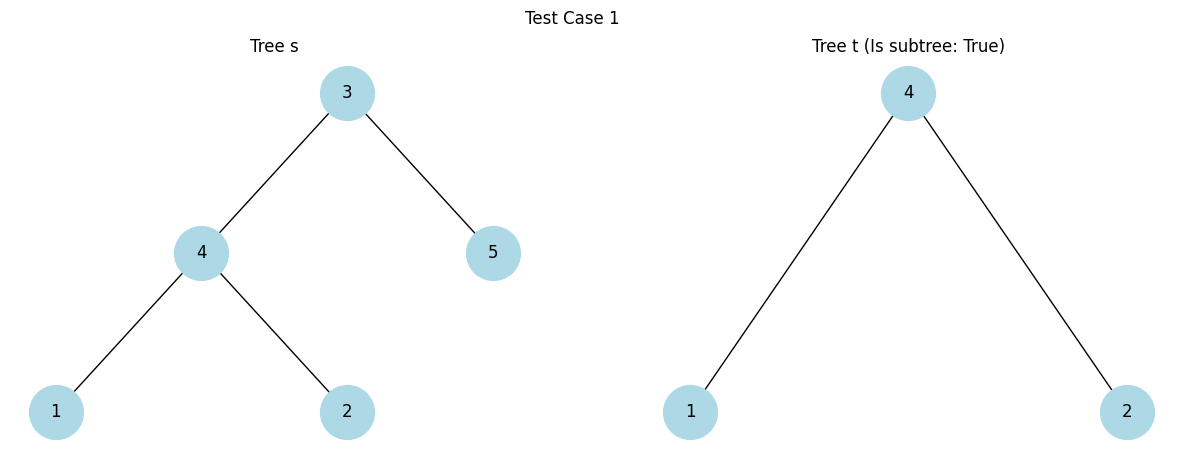

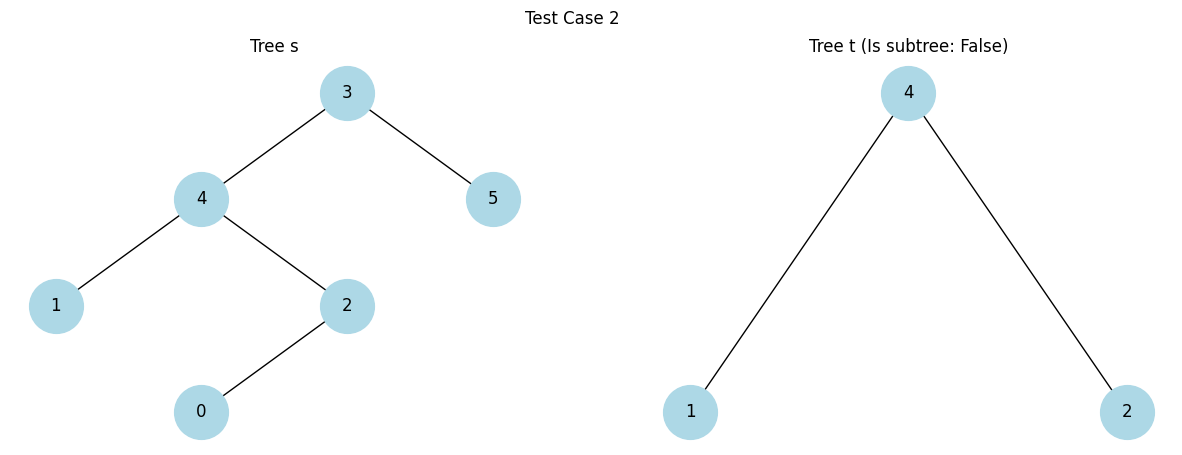

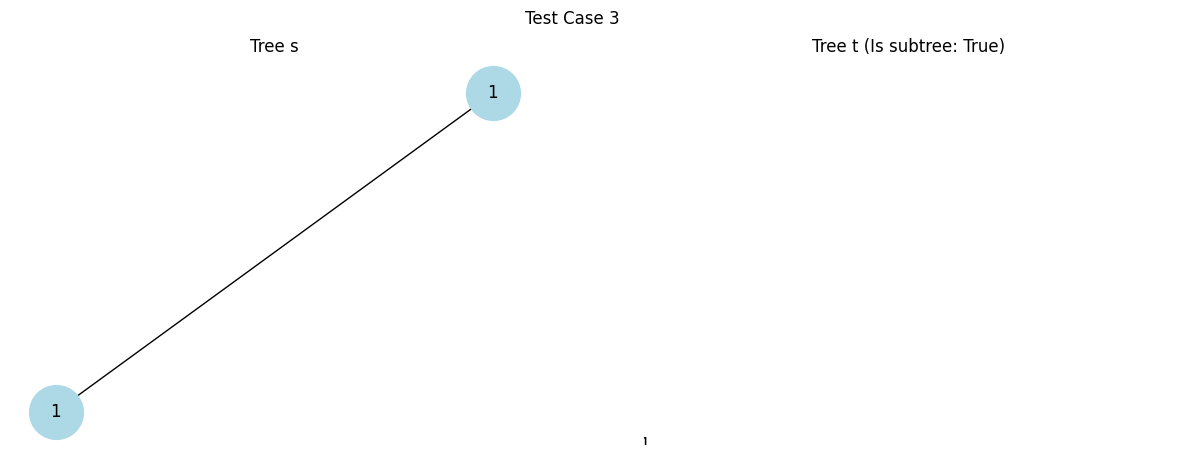

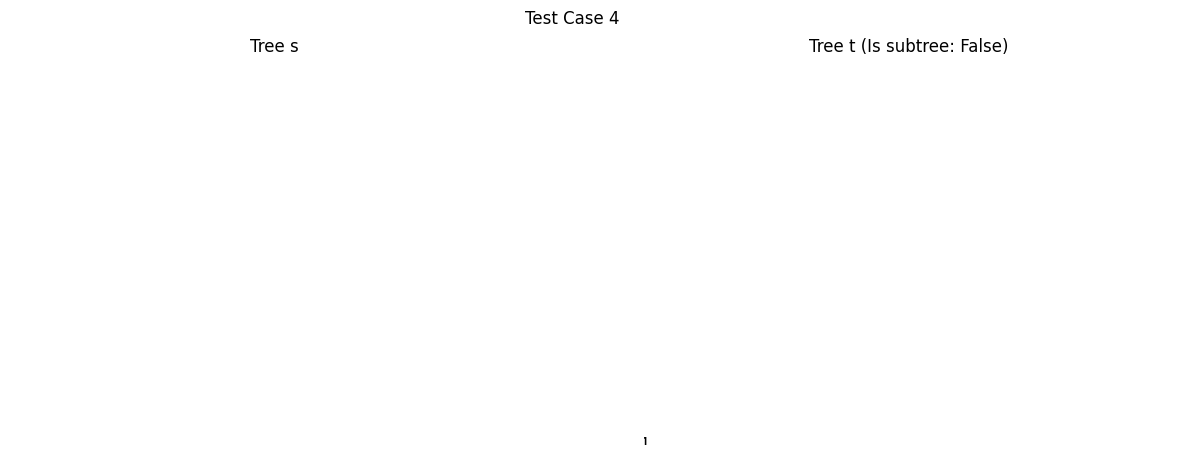

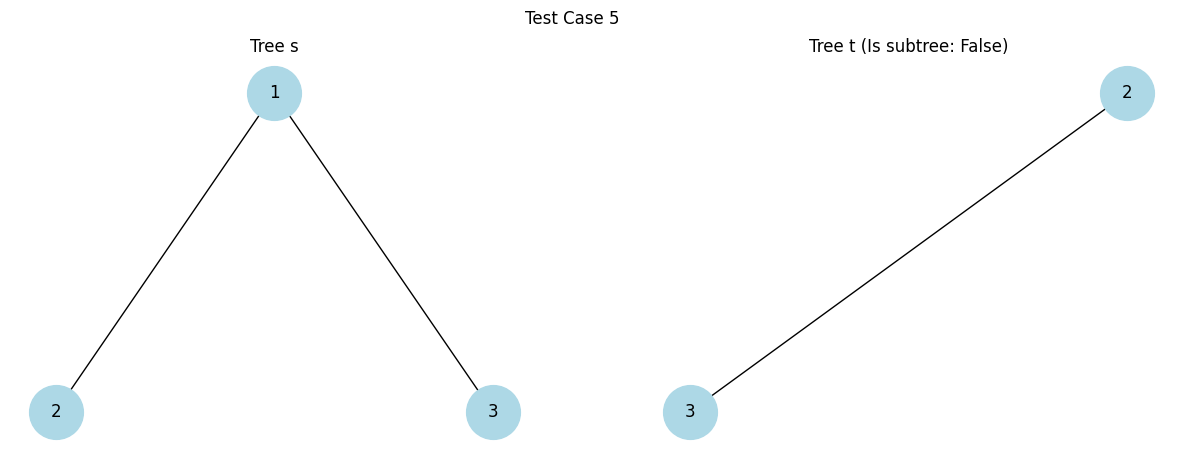

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

class TreeNodeWithID:
    """ A node in a binary tree, with a unique ID for each node. """
    def __init__(self, val, id):
        self.val = val
        self.id = id
        self.left = None
        self.right = None

def build_tree_from_list_with_ids(values):
    """ Build a binary tree from a list of values, assigning a unique ID to each node. """
    if not values:
        return None

    root = TreeNodeWithID(values[0], id=0)
    queue = [(root, 0)]  # (node, id)
    idx = 1

    while idx < len(values):
        parent, parent_id = queue.pop(0)
        left_id = 2 * parent_id + 1
        right_id = 2 * parent_id + 2

        # Add left child
        if idx < len(values) and values[idx] is not None:
            parent.left = TreeNodeWithID(values[idx], left_id)
            queue.append((parent.left, left_id))
        idx += 1

        # Add right child
        if idx < len(values) and values[idx] is not None:
            parent.right = TreeNodeWithID(values[idx], right_id)
            queue.append((parent.right, right_id))
        idx += 1

    return root

def draw_tree_with_networkx(root, ax):
    """ Draw a binary tree using NetworkX and Matplotlib. """
    if root is None:
        return

    # Create a directed graph
    G = nx.DiGraph()
    queue = [(root, 0, 0)]  # (node, x, y)
    positions = {}  # Positions for each node
    labels = {}  # Labels for each node

    while queue:
        node, x, y = queue.pop(0)
        positions[node.id] = (x, -y)  # Negative y for root-down layout
        labels[node.id] = node.val

        # Add children to queue
        if node.left:
            G.add_edge(node.id, node.left.id)
            queue.append((node.left, x - 1, y + 1))

        if node.right:
            G.add_edge(node.id, node.right.id)
            queue.append((node.right, x + 1, y + 1))

    # Draw the tree
    nx.draw(G, positions, labels=labels, with_labels=True, node_size=1500, node_color="lightblue", ax=ax, arrows=False)

# Define test cases
test_cases = [
    ([3, 4, 5, 1, 2], [4, 1, 2]),    # True
    ([3, 4, 5, 1, 2, None, None, None, None, 0], [4, 1, 2]),  # False
    ([1, 1], [1]),  # True
    ([], [1]),  # False
    ([1, 2, 3], [2, 3])  # True
]

# Visualize each test case
for i, (s_list, t_list) in enumerate(test_cases):
    # Build trees from the lists
    s_tree = build_tree_from_list_with_ids(s_list)
    t_tree = build_tree_from_list_with_ids(t_list)

    # Plotting the trees side by side
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot tree s
    draw_tree_with_networkx(s_tree, axs[0])
    axs[0].set_title("Tree s")
    axs[0].axis('off')  # Turn off axis

    # Plot tree t
    draw_tree_with_networkx(t_tree, axs[1])
    axs[1].set_title(f"Tree t (Is subtree: {isSubtree(s_tree, t_tree)})")
    axs[1].axis('off')  # Turn off axis

    plt.suptitle(f"Test Case {i+1}")
    plt.show()

